In [3]:
import pandas as pd
import pymorphy3
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter


In [ ]:
df = pd.read_csv('balanced_15k.csv')
df.drop_duplicates(subset="review", inplace=True, keep='first')

In [5]:
df

,Unnamed: 0,review,sentiment
0,0,"Я дивився кімнату через ажіотаж, що оточує її ...",0
1,1,Цей фільм не можна сприймати серйозно.Мій рейт...,0
2,2,"З тих пір, як я почав відвідувати цей сайт і г...",0
3,3,"Це одне з найгірших виправдань для фільму, яки...",0
4,4,"Не впевнений, як це коли -небудь залишало каме...",0
...,...,...,...
14845,14845,В результаті епічної битви між Суперменом (Ген...,2
14846,14846,"Немає конкурсу, я скажу, що це знаменує найкра...",2
14847,14847,"Так, фільми жахів – цілий феномен індустрії кі...",2
14848,14848,Стрічка Роберта Родрігеса переносить глядача в...,2


In [ ]:
df['review'] = df['review'].str.replace(r'^Review\s*', '', regex=True) 
df['review'] = df['review'].str.strip()
df['review'] = df['review'].str.replace(r'[^\w\s]', ' ', regex=True)   
df['review'] = df['review'].str.lower()
df['review'] = df['review'].str.replace(r'\s+', ' ', regex=True)        

In [7]:
df['tokens'] = df['review'].apply(lambda x: x.split())
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if len(word) > 1])

In [8]:
import stopwordsiso as stopwords
ukrainian_stopwords = stopwords.stopwords("uk")  

with open('stopwords.txt', 'r') as file:
    content = file.read()

content = content.replace("'", '')
stopwords_list = [word.strip() for word in content.split(',')]

for el in stopwords_list:
    ukrainian_stopwords.add(el)

df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in ukrainian_stopwords])

In [60]:
import pickle


with open('ukrainian_stopwords.pkl', 'wb') as f:
    pickle.dump(ukrainian_stopwords, f)

In [9]:
morph = pymorphy3.MorphAnalyzer(lang='uk')
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if morph.parse(word)[0].tag.POS in {'NOUN', 'VERB', 'ADJ', 'ADV', 'ADJF'}])
df['tokens'] = df['tokens'].apply([lambda x :[morph.parse(word)[0].normal_form for word in x]])
df

,Unnamed: 0,review,sentiment,tokens
0,0,я дивився кімнату через ажіотаж що оточує її ...,0,"[дивитися, кімната, ажіотаж, оточувати, момент..."
1,1,цей фільм не можна сприймати серйозно мій рейт...,0,"[фільм, сприймати, рейтинг, стосуватися, актор..."
2,2,з тих пір як я почав відвідувати цей сайт і г...,0,"[почати, відвідувати, сайт, голосувати, фільм,..."
3,3,це одне з найгірших виправдань для фільму яки...,0,"[найгірший, виправдання, фільм, бачити, знати,..."
4,4,не впевнений як це коли небудь залишало каме...,0,"[впевнений, залишати, камера, піти, редагуванн..."
...,...,...,...,...
14845,14845,в результаті епічної битви між суперменом ген...,2,"[результат, епічний, битва, супермен, генрі, к..."
14846,14846,немає конкурсу я скажу що це знаменує найкра...,2,"[конкурс, сказити, знаменувати, найкращий, бра..."
14847,14847,так фільми жахів цілий феномен індустрії кі...,2,"[фільм, жах, цілий, феномен, індустрія, кінема..."
14848,14848,стрічка роберта родрігеса переносить глядача в...,2,"[стрічка, роберт, родрігес, переносити, глядач..."


In [10]:
before = df['tokens']

In [11]:
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if morph.parse(word)[0].tag.POS in {'NOUN', 'VERB', 'ADJ', 'ADV', 'ADJF'}])

In [12]:
df

,Unnamed: 0,review,sentiment,tokens
0,0,я дивився кімнату через ажіотаж що оточує її ...,0,"[дивитися, кімната, ажіотаж, оточувати, момент..."
1,1,цей фільм не можна сприймати серйозно мій рейт...,0,"[фільм, сприймати, рейтинг, стосуватися, актор..."
2,2,з тих пір як я почав відвідувати цей сайт і г...,0,"[почати, відвідувати, сайт, голосувати, фільм,..."
3,3,це одне з найгірших виправдань для фільму яки...,0,"[найгірший, виправдання, фільм, бачити, знати,..."
4,4,не впевнений як це коли небудь залишало каме...,0,"[впевнений, залишати, камера, піти, редагуванн..."
...,...,...,...,...
14845,14845,в результаті епічної битви між суперменом ген...,2,"[результат, епічний, битва, супермен, генрі, к..."
14846,14846,немає конкурсу я скажу що це знаменує найкра...,2,"[конкурс, сказити, знаменувати, найкращий, бра..."
14847,14847,так фільми жахів цілий феномен індустрії кі...,2,"[фільм, жах, цілий, феномен, індустрія, кінема..."
14848,14848,стрічка роберта родрігеса переносить глядача в...,2,"[стрічка, роберт, родрігес, переносити, глядач..."


In [54]:
morph.parse('найпопулярніший')[0]

Parse(word='найпопулярніший', tag=OpencorporaTag('ADJF masc,nomn'), normal_form='найпопулярніший', score=1.0, methods_stack=((DictionaryAnalyzer(), 'найпопулярніший', 5, 0),))

In [98]:
df['tokens'] 

0        [вийти, референдум, збиратися, визначити, майб...
1        [дивитися, повний, переглянути, трейлер, відео...
2        [дивовижний, навчати, дефектуват, життя, бачит...
3        [найсміливіший, бачити, довгий, продаватися, к...
4        [огляд, базуватися, дорогоцінний, хвилина, вит...
                               ...                        
11367    [холодне, кров, янога, вбивство, хлопчик, вело...
11368    [епізод, ятого, сезон, річ, повертатися, спокі...
11369    [тривожний, веселий, епізод, ритм, тон, викуп,...
11370    [найпопулярніший, рейтинговий, шоу, раритет, с...
11371    [перегляд, серіал, епізод, ненавидіти, написат...
Name: tokens, Length: 10510, dtype: object

In [30]:
df['text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X, df['target'])


In [43]:
before = df['tokens']

In [14]:
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)
min_freq = 2  
max_freq = 0.8 * len(df)
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if min_freq <= word_freq[word] <= max_freq])


0 : ('мати', 11567)
1 : ('історія', 9011)
2 : ('персонаж', 8674)
3 : ('зробити', 7046)
4 : ('бачити', 6312)
5 : ('сцена', 6269)
6 : ('робити', 6192)
7 : ('актор', 5227)
8 : ('людина', 5077)
9 : ('акторський', 4958)
10 : ('великий', 4945)
11 : ('сюжет', 4885)
12 : ('чудовий', 4871)
13 : ('режисер', 4869)
14 : ('життя', 4853)
15 : ('шоу', 4832)
16 : ('знати', 4771)
17 : ('головний', 4749)
18 : ('думати', 4742)
19 : ('дивитися', 4506)
20 : ('герой', 4504)
21 : ('хороший', 4417)
22 : ('повинний', 4321)
23 : ('частина', 4066)
24 : ('стрічка', 3889)
25 : ('робот', 3778)
26 : ('річ', 3772)
27 : ('намагатися', 3754)
28 : ('побачити', 3725)
29 : ('епізод', 3626)
30 : ('жахливий', 3316)
31 : ('момент', 3304)
32 : ('хотіти', 3303)
33 : ('виглядати', 3230)
34 : ('дитина', 3112)
35 : ('поганий', 3101)
36 : ('сценарій', 3072)
37 : ('кіно', 3058)
38 : ('грати', 2993)
39 : ('перший', 2975)
40 : ('майстерність', 2866)
41 : ('справжній', 2866)
42 : ('дія', 2816)
43 : ('жах', 2777)
44 : ('глядач', 2746)


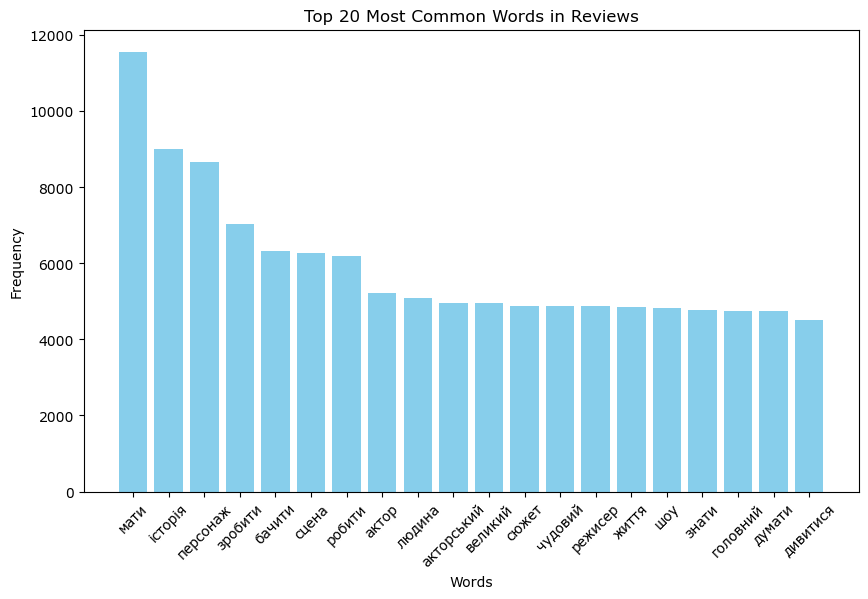

In [29]:
from collections import Counter
import itertools

all_tokens = list(itertools.chain(*df['tokens']))

word_counts = Counter(all_tokens)

most_common_words = word_counts.most_common(20)  
words, counts = zip(*most_common_words)
for i, w in enumerate(word_counts.most_common(50)):
    print(i, ':', w)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Reviews')
plt.xticks(rotation=45)
plt.show()

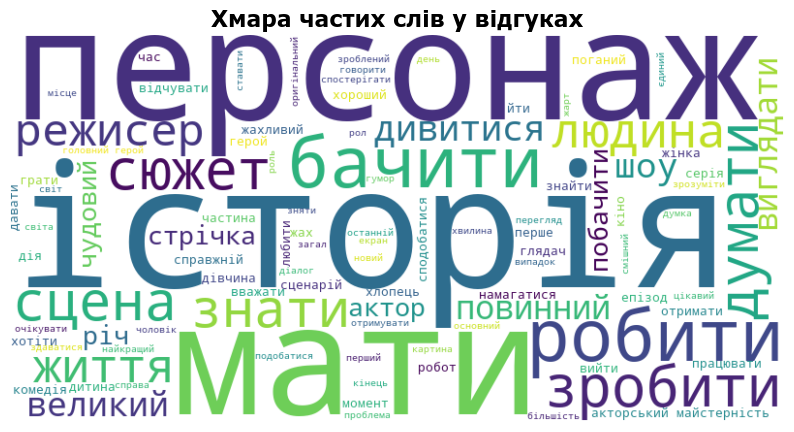

In [31]:
from wordcloud import WordCloud

text = ' '.join(df['text'])
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis', 
    max_words=100
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Хмара частих слів у відгуках', fontsize=16, fontweight='bold')
plt.show()


C:\Users\BOSS\AppData\Local\Temp\ipykernel_13816\1999812731.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words), x=list(counts), palette='viridis')


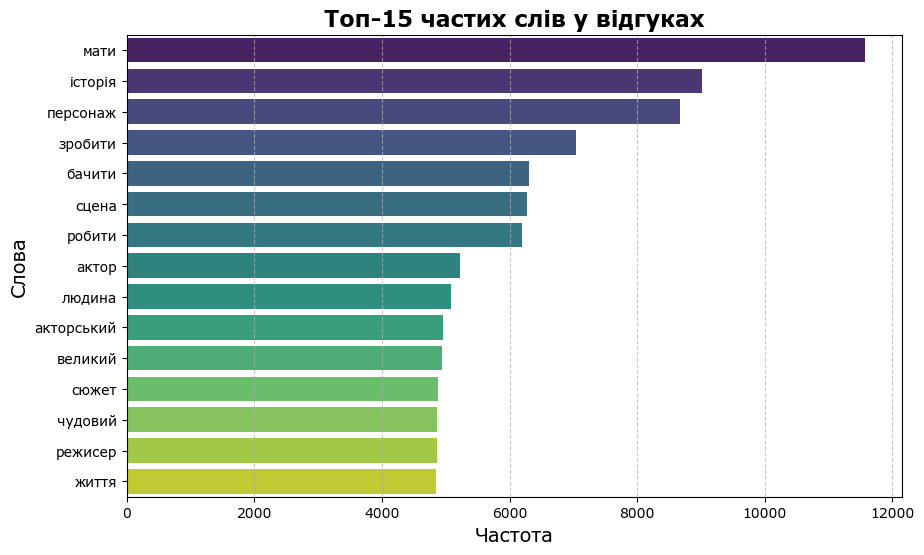

In [44]:
from collections import Counter
import seaborn as sns


all_tokens = list(itertools.chain(*df['tokens']))

word_counts = Counter(all_tokens)
common_words = word_counts.most_common(15)

words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(y=list(words), x=list(counts), palette='viridis')
plt.title('Топ-15 частих слів у відгуках', fontsize=16, fontweight='bold')
plt.xlabel('Частота', fontsize=14)
plt.ylabel('Слова', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [3]:
df = pd.read_csv(
    '19k_preprocessed.csv'
)

In [74]:
df['tokens']

0        ['пілот', 'раст', 'грізвольд', 'ед', 'хелмс', ...
1        ['любити', 'надавати', 'користь', 'сумнів', 'д...
2        ['стверджувати', 'хотіти', 'центр', 'увага', '...
3        ['слід', 'переглянути', 'приймати', 'судження'...
4        ['оригінальний', 'дівчина', 'класичний', 'кіне...
                               ...                        
18961    ['фантастичний', 'займатися', 'битва', 'добре'...
18962    ['режисер', 'джеймс', 'спеціалізуватися', 'сер...
18963    ['талановитий', 'документальний', 'сергій', 'л...
18964    ['варта', 'відзначити', 'головний', 'режисер',...
18965    ['спостерігач', 'правити', 'нудьгувати', 'пост...
Name: tokens, Length: 18966, dtype: object

In [ ]:
[' '.join([word for word in sentence]) for sentence in df['Tokens']]

In [87]:
import ast

In [88]:
df['text'] = [' '.join([word for word in ast.literal_eval(rev)]) for rev in df['tokens']]

In [ ]:
df['tokens'][0]

"['пілот', 'раст', 'грізвольд', 'ед', 'хелмс', 'вважати', 'щаслива', 'родина', 'дружина', 'крістіан', 'епплгейт', 'набридлий', 'рутина', 'син', 'джеймс', 'кевін', 'ненавидіти', 'відбуватися', 'згуртувати', 'рідні', 'раст', 'приймати', 'рішення', 'повторити', 'найкращий', 'канікули', 'життя', 'вирушити', 'парка', 'розвага', 'країна', 'пригода', 'обійтися', 'рік', 'вихід', 'легендарний', 'канікули', 'харольд', 'реміса', 'виблискувати', 'чева', 'чейз', 'грізвольд', 'повертатися', 'великий', 'екран', 'щастя', 'йтися', 'ребут', 'місце', 'головний', 'герой', 'зайняти', 'підрослий', 'син', 'герой', 'чейз', 'расті', 'концепція', 'історія', 'справа', 'сценарій', 'належати', 'пер', 'класик', 'джон', 'хьюз', 'братися', 'молодь', 'дует', 'дейл', 'голдштейн', 'ребут', 'людина', 'павук', 'канікули', 'віритися', 'довірити', 'важливий', 'робот', 'людина', 'поставити', 'невибагливий', 'шаблонний', 'змусити', 'крістіна', 'епплгейт', 'блювати', 'купатися', 'яма', 'каналізаційний', 'відходи', 'варта', 'му

In [89]:
df['text']

0        пілот раст грізвольд ед хелмс вважати щаслива ...
1        любити надавати користь сумнів дивитися шоу ят...
2        стверджувати хотіти центр увага обов язок коро...
3        слід переглянути приймати судження взяти річни...
4        оригінальний дівчина класичний кінець захоплюю...
                               ...                        
18961    фантастичний займатися битва добре людина дове...
18962    режисер джеймс спеціалізуватися середньобюджет...
18963    талановитий документальний сергій лозниця спір...
18964    варта відзначити головний режисер джейк кездан...
18965    спостерігач правити нудьгувати постійний перес...
Name: text, Length: 18966, dtype: object

In [63]:
df

,Unnamed: 0.1,Unnamed: 0,review,sentiment,tokens,text
0,0,0,пілот раст грізвольд ед хелмс вважає що у н...,0,"['пілот', 'раст', 'грізвольд', 'ед', 'хелмс', ...",пілот раст грізвольд ед хелмс вважати щаслива ...
1,1,1,гаразд я люблю надавати користь сумніву я див...,0,"['любити', 'надавати', 'користь', 'сумнів', 'д...",любити надавати користь сумнів дивитися шоу ят...
2,2,2,вони стверджують що вони не хочуть бути в цен...,0,"['стверджувати', 'хотіти', 'центр', 'увага', '...",стверджувати хотіти центр увага обов язок коро...
3,3,3,скільки фільму слід переглянути перш ніж прий...,0,"['слід', 'переглянути', 'приймати', 'судження'...",фільм слід переглянути приймати судження взяти...
4,4,4,оригінальні дівчата powerpuff були класичними ...,0,"['оригінальний', 'дівчина', 'класичний', 'кіне...",оригінальний дівчина класичний кінець захоплюю...
...,...,...,...,...,...,...
18961,18961,18961,зважаючи на те що це науково фантастичний фі...,2,"['фантастичний', 'займатися', 'битва', 'добре'...",фантастичний фільм займатися битва добре людин...
18962,18962,18962,режисер джеймс ван який раніше спеціалізувавс...,2,"['режисер', 'джеймс', 'спеціалізуватися', 'сер...",режисер джеймс спеціалізуватися середньобюджет...
18963,18963,18963,до сьогодні дуже талановиті документальні філь...,2,"['талановитий', 'документальний', 'сергій', 'л...",талановитий документальний фільм сергій лозниц...
18964,18964,18964,варто відзначити головне режисерові джейку ке...,2,"['варта', 'відзначити', 'головний', 'режисер',...",варта відзначити головний режисер джейк кездан...


In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [33]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000,  # Optional: limit features for performance
                            ngram_range=(1, 2), # Unigrams and bigrams
                            # max_df=0.9,         # Ignore very frequent words
                            # min_df=1
                            )           # Ignore very rare words

# Fit and transform the text data
X = vectorizer.fit_transform(df['text'])

In [61]:
import joblib
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [34]:
y = df['sentiment']  # Assuming 'sentiment' contains labels 0, 1, 2

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
svc = LinearSVC(class_weight='balanced', C=0.1, dual='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7323232323232324
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       952
           1       0.67      0.63      0.65       984
           2       0.75      0.76      0.75      1034

    accuracy                           0.73      2970
   macro avg       0.73      0.73      0.73      2970
weighted avg       0.73      0.73      0.73      2970



In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='multinomial', class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.732996632996633
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       952
           1       0.65      0.66      0.65       984
           2       0.76      0.75      0.75      1034

    accuracy                           0.73      2970
   macro avg       0.73      0.73      0.73      2970
weighted avg       0.73      0.73      0.73      2970



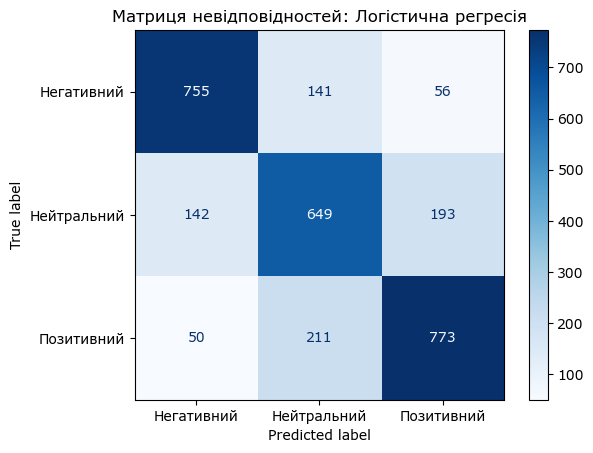

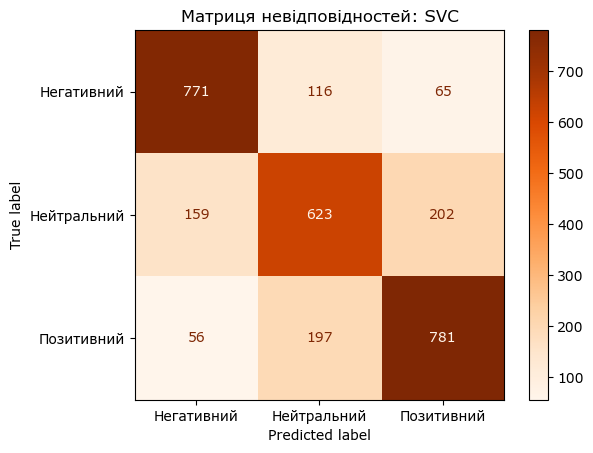

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Негативний', 'Нейтральний', 'Позитивний'])
disp_log.plot(cmap='Blues')
plt.title('Матриця невідповідностей: Логістична регресія')
plt.show()

# Linear SVC Confusion Matrix
svc.fit(X_train, y_train)  # Re-train for SVC if needed
y_pred_svc = svc.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Негативний', 'Нейтральний', 'Позитивний'])
disp_svc.plot(cmap='Oranges')
plt.title('Матриця невідповідностей: SVC')
plt.show()


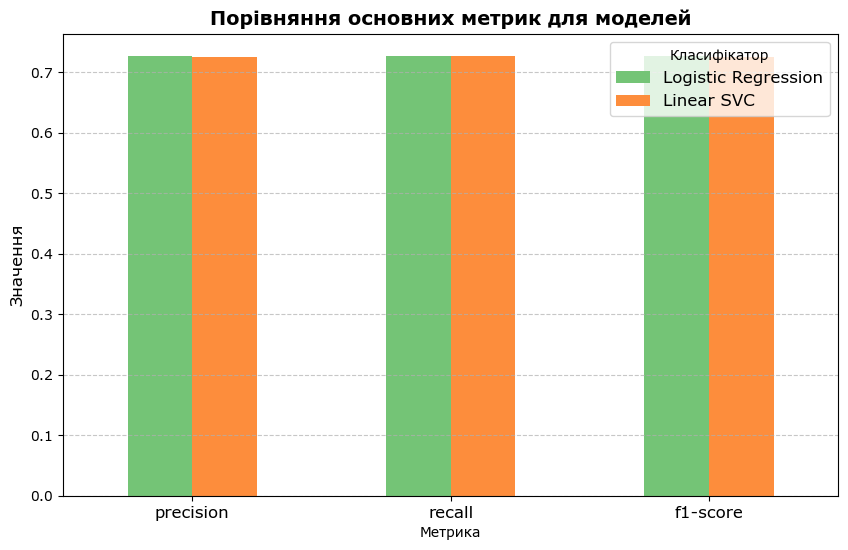

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Classification reports for both classifiers
log_reg_report = classification_report(y_test, y_pred, output_dict=True)
svc_report = classification_report(y_test, y_pred_svc, output_dict=True)

# Convert reports to DataFrames
metrics = ['precision', 'recall', 'f1-score']
df_metrics = pd.DataFrame({
    'Метрика': metrics,
    'Logistic Regression': [log_reg_report['weighted avg'][m] for m in metrics],
    'Linear SVC': [svc_report['weighted avg'][m] for m in metrics]
})

# Plot comparison bar chart
df_metrics.plot(x='Метрика', kind='bar', figsize=(10, 6), color=['#74C476', '#FD8D3C'])
plt.title('Порівняння основних метрик для моделей', fontsize=14, fontweight='bold')
plt.ylabel('Значення', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Класифікатор', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


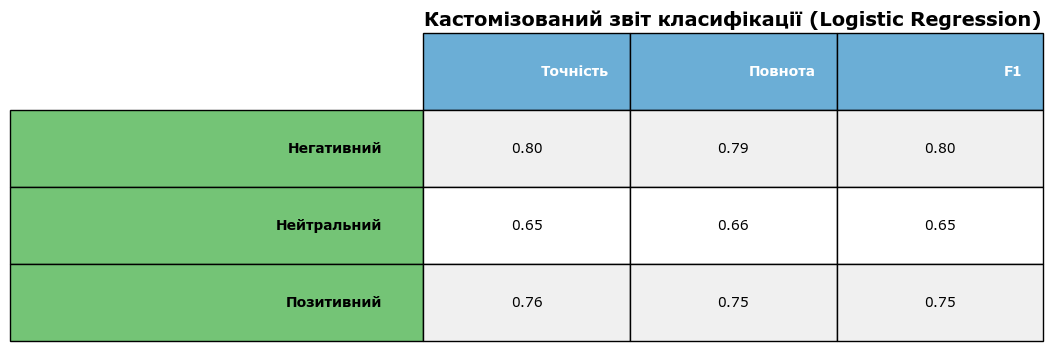

In [48]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Get classification report as a DataFrame
log_reg_report = classification_report(y_test, y_pred, target_names=['Негативний', 'Нейтральний', 'Позитивний'], output_dict=True)
df_report = pd.DataFrame(log_reg_report).T

# Highlight rows for classes and exclude support
df_report = df_report.iloc[:-3, :3].round(2)  # Precision, Recall, F1

# Plot a styled table
plt.figure(figsize=(8, 4))
ax = plt.gca()
ax.set_axis_off()
tbl = Table(ax, bbox=[0, 0, 1, 1])

# Add table cells
for i, row in enumerate(df_report.index):
    for j, val in enumerate(df_report.columns):
        text = f"{df_report.iloc[i, j]:.2f}" if isinstance(df_report.iloc[i, j], (float, int)) else df_report.iloc[i, j]
        cell = tbl.add_cell(i + 1, j, width=0.2, height=0.2)
        cell.set_text_props(ha='center', va='center')
        cell.set_facecolor('#F0F0F0' if i % 2 == 0 else '#FFFFFF')
        cell.get_text().set_text(text)

# Add headers
for j, col in enumerate(['Точність', 'Повнота', 'F1']):
    cell = tbl.add_cell(0, j, width=0.2, height=0.2)
    cell.set_text_props(fontweight='bold', color='white')
    cell.set_facecolor('#6BAED6')
    cell.get_text().set_text(col)

# Add row labels
for i, idx in enumerate(df_report.index):
    cell = tbl.add_cell(i + 1, -1, width=0.4, height=0.2)
    cell.set_text_props(fontweight='bold')
    cell.set_facecolor('#74C476' if i < 3 else '#FD8D3C')
    cell.get_text().set_text(idx)

ax.add_table(tbl)
plt.title('Кастомізований звіт класифікації (Logistic Regression)', fontsize=14, fontweight='bold')
plt.show()


In [51]:
# Define classes and metrics
classes = ['Негативний', 'Нейтральний', 'Позитивний']  # Class labels
metrics = ['precision', 'recall', 'f1-score']  # Metrics to visualize


In [59]:
df.to_csv('15k_preprocessed_b.csv')

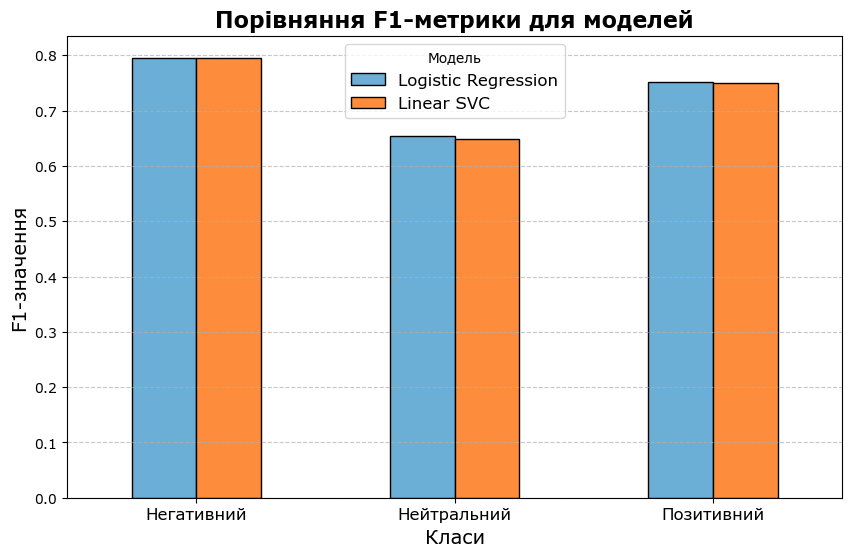

In [ ]:
# SVC classification report
svc_report = classification_report(y_test, y_pred_svc, target_names=['Негативний', 'Нейтральний', 'Позитивний'], output_dict=True)

# Combine metrics into a single DataFrame
df_combined = pd.DataFrame({
    'Logistic Regression': [log_reg_report[cls]['f1-score'] for cls in classes],
    'Linear SVC': [svc_report[cls]['f1-score'] for cls in classes]
}, index=classes)

# Plot comparison bar chart
df_combined.plot(kind='bar', figsize=(10, 6), color=['#6BAED6', '#FD8D3C'], edgecolor='black')
plt.title('Порівняння F1-метрики для моделей', fontsize=16, fontweight='bold')
plt.ylabel('F1-значення', fontsize=14)
plt.xlabel('Класи', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Модель', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

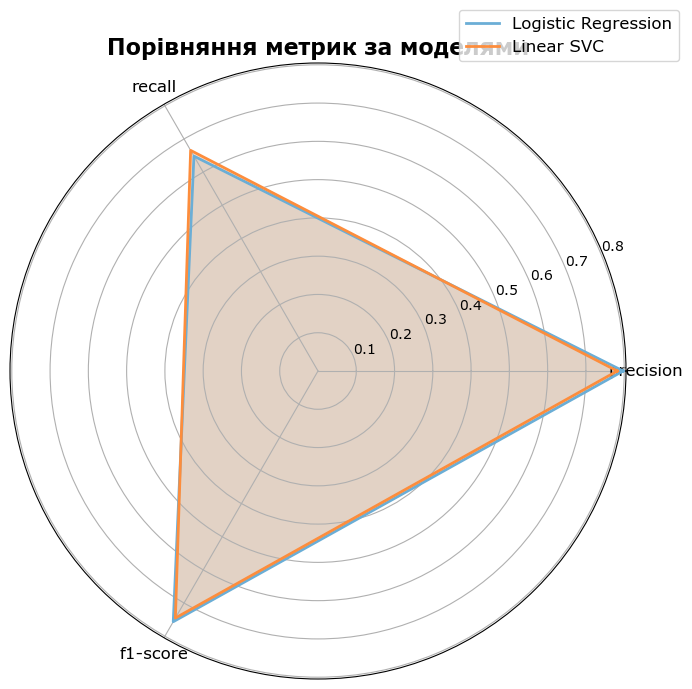

In [53]:
from math import pi

# Prepare data for radar plot
metrics = ['precision', 'recall', 'f1-score']
log_values = [log_reg_report[cls][metric] for metric in metrics for cls in classes]
svc_values = [svc_report[cls][metric] for metric in metrics for cls in classes]

angles = [n / 3 * 2 * pi for n in range(3)] + [0]
classes = ['Негативний', 'Нейтральний', 'Позитивний']

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot Logistic Regression
values = log_values[:3] + [log_values[0]]
ax.plot(angles, values, label="Logistic Regression", color='#6BAED6', linewidth=2)
ax.fill(angles, values, color='#6BAED6', alpha=0.25)

# Plot Linear SVC
values = svc_values[:3] + [svc_values[0]]
ax.plot(angles, values, label="Linear SVC", color='#FD8D3C', linewidth=2)
ax.fill(angles, values, color='#FD8D3C', alpha=0.25)

# Add customizations
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12)
plt.title("Порівняння метрик за моделями", fontsize=16, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=12)
plt.show()


In [56]:
from sklearn.linear_model import LogisticRegression
from joblib import dump, load

# Train a sample model
# log_reg = LogisticRegression(multi_class='multinomial', class_weight='balanced')
# log_reg.fit(X_train, y_train)

# Save the trained model to a file
dump(svc, 'models/linear_svc.joblib')  # Saves as a .joblib file
print("Model saved as 'linear_svc.joblib'")

# Load the model back
# loaded_model = load('logistic_regression_model.joblib')
# print("Model loaded successfully")

# Use the loaded model for prediction
# y_pred = loaded_model.predict(X_test)
# print(y_pred)


Model saved as 'linear_svc.joblib'


In [58]:
loaded_model = load('models/logistic_regression_model.joblib')
print("Model loaded successfully")

# Use the loaded model for prediction
y_pred = loaded_model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model loaded successfully
0.732996632996633
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       952
           1       0.65      0.66      0.65       984
           2       0.76      0.75      0.75      1034

    accuracy                           0.73      2970
   macro avg       0.73      0.73      0.73      2970
weighted avg       0.73      0.73      0.73      2970



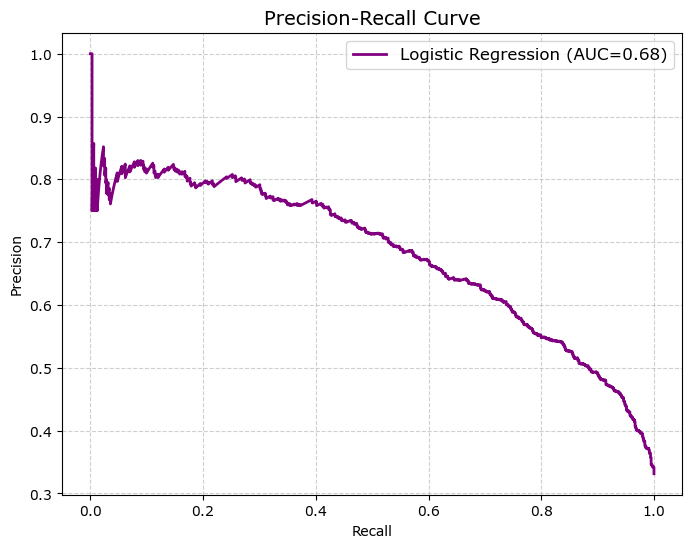

In [24]:
from sklearn.metrics import precision_recall_curve, auc

# Get probabilities for Logistic Regression
y_prob_log = log_reg.predict_proba(X_test)[:, 1]  # Assuming binary classification

precision, recall, _ = precision_recall_curve(y_test, y_prob_log, pos_label=1)
auc_pr = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'Logistic Regression (AUC={auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.6, linestyle='--')
plt.show()


In [ ]:
from mlxtend.plotting import plot_decision_regions

# Assuming 2D features for visualization
X_2D = X_train[:, :2]  # Use only first two features for simplicity
svc = LinearSVC(class_weight='balanced', C=1, dual=False)
svc.fit(X_2D, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_2D, y_train, clf=svc, legend=2)
plt.title('Розділення за рішенням SVC', fontsize=14)
plt.xlabel('Ознака 1', fontsize=12)
plt.ylabel('Ознака 2', fontsize=12)
plt.show()


In [114]:
print(list(y_test))

[1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 

In [163]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class HierarchicalSentimentClassifier:
    def __init__(self, neutral_threshold=0.6, pos_neg_threshold=0.5):
        self.neutral_clf = LogisticRegression(class_weight='balanced')
        self.pos_neg_clf = LogisticRegression(class_weight='balanced')
        self.neutral_threshold = neutral_threshold
        self.pos_neg_threshold = pos_neg_threshold
    
    def fit(self, X, y):
        # Step 1: Train the Neutral vs. Non-neutral classifier
        y_neutral = (y == 1).astype(int)
        self.neutral_clf.fit(X, y_neutral)
        
        # Step 2: Train the Positive vs. Negative classifier on non-neutral samples
        X_pos_neg = X[y != 1]
        y_pos_neg = (y[y != 1] == 2).astype(int)
        self.pos_neg_clf.fit(X_pos_neg, y_pos_neg)
    
    def predict(self, X):
        # Step 1: Predict Neutral vs Non-neutral
        neutral_probs = self.neutral_clf.predict_proba(X)[:, 1]
        neutral_pred = (neutral_probs >= self.neutral_threshold).astype(int)
        
        # Initialize final predictions array
        final_predictions = np.ones_like(neutral_pred)  # Default to neutral (1)
        
        # Step 2: For Non-neutral samples, classify as Positive or Negative
        non_neutral_indices = np.where(neutral_pred == 0)[0]
        if len(non_neutral_indices) > 0:
            X_non_neutral = X[non_neutral_indices]
            pos_neg_probs = self.pos_neg_clf.predict_proba(X_non_neutral)[:, 1]
            pos_neg_pred = (pos_neg_probs >= self.pos_neg_threshold).astype(int)
            
            # Map pos_neg_pred 0/1 to 0 (Negative) and 2 (Positive)
            final_predictions[non_neutral_indices] = pos_neg_pred * 2
        
        return final_predictions
    
    def score(self, X, y):
        # Generate predictions and map true labels
        y_pred = self.predict(X)
        y_mapped = np.where(y == 1, 1, np.where(y == 2, 2, 0))  # Map test labels to 0, 1, 2
        
        # Compute and print accuracy, classification report, and confusion matrix
        accuracy = accuracy_score(y_mapped, y_pred)
        report = classification_report(y_mapped, y_pred, zero_division=1)
        matrix = confusion_matrix(y_mapped, y_pred, labels=[0, 1, 2])
        
        return accuracy, report, matrix

# Example usage remains the same


# Example usage
# Model training and evaluation code remains as in the previous example




In [96]:

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.7171850289931471
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1267
           1       0.67      0.62      0.64      1310
           2       0.72      0.73      0.73      1217

    accuracy                           0.72      3794
   macro avg       0.72      0.72      0.72      3794
weighted avg       0.71      0.72      0.72      3794



In [ ]:
svc = LinearSVC(class_weight='balanced', C=0.1, dual='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [174]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define base estimators
estimators = [
    ('log_reg', LogisticRegression(multi_class='multinomial', class_weight='balanced')),
    ('svc', LinearSVC(class_weight='balanced', C=0.1, dual='auto'))
]

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(class_weight='balanced', n_estimators=100),
    cv=5  # Cross-validation within the stacking classifier
)

# Fit and evaluate with cross-validation
stacking_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5)
print("Stacking Classifier CV Accuracy:", stacking_scores.mean())


Stacking Classifier CV Accuracy: 0.7008813620226337


In [176]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(stacking_clf, X_train, y_train, cv=skf)
print("Cross-Validation Accuracy:", cross_val_scores.mean())


Cross-Validation Accuracy: 0.6985019675027817


In [31]:
import numpy as np

# Predict labels for test data
log_reg_labels = log_reg.predict(X_test)
svc_labels = svc.predict(X_test)

# Identify incorrectly predicted samples for each model
log_reg_errors = log_reg_labels != y_test
svc_errors = svc_labels != y_test

# Find the overlap of errors (samples both models classified incorrectly)
common_errors = np.logical_and(log_reg_errors, svc_errors)

# Calculate statistics
total_errors = len(y_test)
overlap_count = np.sum(common_errors)
overlap_percentage = (overlap_count / total_errors) * 100

# Output results
print(f"Total test samples: {len(y_test)}")
print(f"Total errors by Logistic Regression: {np.sum(log_reg_errors)}")
print(f"Total errors by SVC: {np.sum(svc_errors)}")
print(f"Common wrong predictions (overlap): {overlap_count} ({overlap_percentage:.2f}%)")

Total test samples: 3794
Total errors by Logistic Regression: 1014
Total errors by SVC: 1014
Common wrong predictions (overlap): 951 (25.07%)


In [35]:
import numpy as np

# Predict labels for test data
log_reg_labels = log_reg.predict(X_test)
svc_labels = mnb.predict(X_test)

# Identify incorrectly predicted samples for each model
log_reg_errors = log_reg_labels != y_test
svc_errors = svc_labels != y_test

# Find the overlap of errors (samples both models classified incorrectly)
common_errors = np.logical_and(log_reg_errors, svc_errors)

# Calculate statistics
total_errors = len(y_test)
overlap_count = np.sum(common_errors)
overlap_percentage = (overlap_count / total_errors) * 100

# Output results
print(f"Total test samples: {len(y_test)}")
print(f"Total errors by Logistic Regression: {np.sum(log_reg_errors)}")
print(f"Total errors by mnb: {np.sum(svc_errors)}")
print(f"Common wrong predictions (overlap): {overlap_count} ({overlap_percentage:.2f}%)")

Total test samples: 3794
Total errors by Logistic Regression: 1014
Total errors by mnb: 1051
Common wrong predictions (overlap): 792 (20.88%)


In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Train individual models
# log_reg = LogisticRegression(multi_class='multinomial', class_weight='balanced').fit(X_train, y_train)
# svc = SVC(class_weight='balanced', probability=True).fit(X_train, y_train)
# gbm = GradientBoostingClassifier().fit(X_train, y_train)

# Predict and average predictions
log_reg_pred = log_reg.predict_proba(X_test)
mnb_pred = mnb.predict_proba(X_test)

# Average predictions
avg_pred = (1.3*log_reg_pred + 0.7*mnb_pred) / 2
avg_pred_labels_2 = avg_pred.argmax(axis=1)

print("Averaged Model Accuracy:", accuracy_score(y_test, avg_pred_labels_2))


Averaged Model Accuracy: 0.7311544544016869


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train individual models
log_reg = LogisticRegression(multi_class='multinomial', class_weight='balanced').fit(X_train, y_train)
svc = SVC(class_weight='balanced', probability=True).fit(X_train, y_train)
# gbm = GradientBoostingClassifier().fit(X_train, y_train)

# Predict and average predictions
log_reg_pred = log_reg.predict_proba(X_test)
svc_pred = svc.predict_proba(X_test)

# Average predictions
avg_pred = (log_reg_pred + svc_pred) / 2
avg_pred_labels = avg_pred.argmax(axis=1)

print("Averaged Model Accuracy:", accuracy_score(y_test, avg_pred_labels))


Averaged Model Accuracy: 0.7353716394306801


In [27]:
cm = confusion_matrix(y_test, avg_pred_labels)

In [28]:
print(classification_report(y_test, avg_pred_labels))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1267
           1       0.67      0.64      0.66      1310
           2       0.74      0.77      0.76      1217

    accuracy                           0.74      3794
   macro avg       0.74      0.74      0.74      3794
weighted avg       0.73      0.74      0.73      3794



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score
from joblib import Parallel, delayed

# Define scoring metrics for optimization
scoring = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score, average='weighted'),
           'recall': make_scorer(recall_score, average='weighted')}

# Set up pipelines for each model with hyperparameters to tune
log_reg_pipeline = Pipeline([
    ('log_reg', LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000))
])

svc_pipeline = Pipeline([
    ('svc', SVC(class_weight='balanced', probability=True))
])

# Define hyperparameters for GridSearchCV
log_reg_params = {
    'log_reg__C': [0.1, 1, 10],
    'log_reg__multi_class': ['multinomial', 'ovr']
}

svc_params = {
    'svc__kernel': ['linear', 'rbf'],
}

# Perform GridSearchCV with parallel processing using joblib
with Parallel(n_jobs=-1) as parallel:
    # Logistic Regression optimization
    log_reg_search = GridSearchCV(log_reg_pipeline, log_reg_params, cv=5, scoring=scoring, refit='f1', n_jobs=-1)
    log_reg_best = log_reg_search.fit(X_train, y_train)

    # SVC optimization
    svc_search = GridSearchCV(svc_pipeline, svc_params, cv=5, scoring=scoring, refit='f1', n_jobs=-1)
    svc_best = svc_search.fit(X_train, y_train)

# Display best parameters and scores for both models
print("Best Logistic Regression parameters:", log_reg_best.best_params_)
print("Best Logistic Regression F1 score:", log_reg_best.best_score_)
print("Best SVC parameters:", svc_best.best_params_)
print("Best SVC F1 score:", svc_best.best_score_)

# Ensemble averaging using the best models
log_reg_pred = log_reg_best.predict_proba(X_test)
svc_pred = svc_best.predict_proba(X_test)

# Average predictions and determine final class labels
avg_pred = (log_reg_pred + svc_pred) / 2
avg_pred_labels = avg_pred.argmax(axis=1)

# Evaluate final ensemble model
print("Averaged Model Accuracy:", accuracy_score(y_test, avg_pred_labels))
print("Averaged Model F1 Score:", f1_score(y_test, avg_pred_labels, average='weighted'))
print("Averaged Model Recall:", recall_score(y_test, avg_pred_labels, average='weighted'))


Best Logistic Regression parameters: {'log_reg__C': 1, 'log_reg__multi_class': 'multinomial'}
Best Logistic Regression F1 score: 0.7255926622495623
Best SVC parameters: {'svc__kernel': 'rbf'}
Best SVC F1 score: 0.7295988463118173
Averaged Model Accuracy: 0.7439293598233996
Averaged Model F1 Score: 0.7424966238213305
Averaged Model Recall: 0.7439293598233996


In [30]:
print(classification_report(y_test, avg_pred_labels))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       953
           1       0.66      0.61      0.64       844
           2       0.75      0.80      0.78       921

    accuracy                           0.74      2718
   macro avg       0.74      0.74      0.74      2718
weighted avg       0.74      0.74      0.74      2718



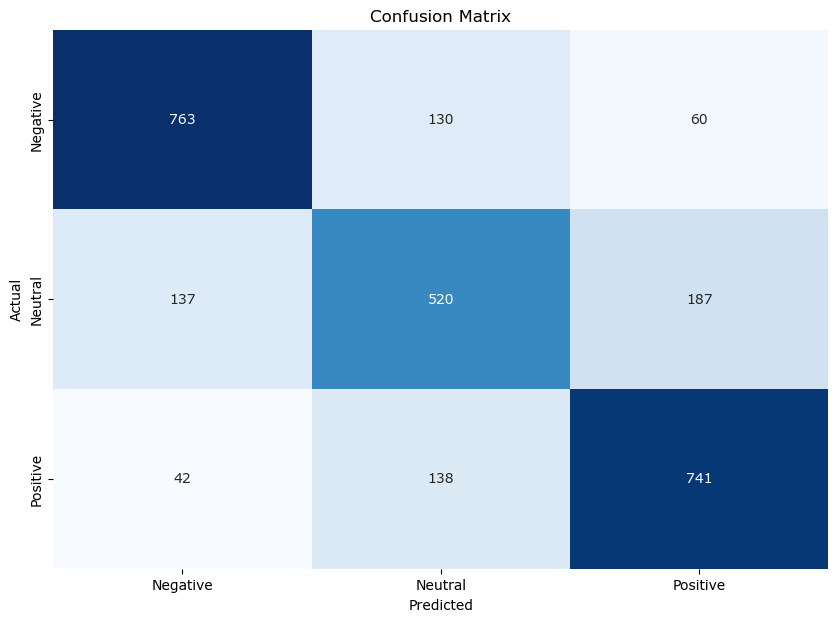

In [27]:
import seaborn as sns 

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

# Labels and title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [181]:
y_pred = log_reg.predict(X_test)

# y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7216936251189343
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       581
           1       0.65      0.61      0.63       704
           2       0.76      0.81      0.79       817

    accuracy                           0.72      2102
   macro avg       0.72      0.72      0.72      2102
weighted avg       0.72      0.72      0.72      2102

